## Fraud detection
Our tasks
- Explore the dataset/visualize
- Decide which features are important
- Perform machine learning
- Test the model on the testing set

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [49]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,149483.0,1.777266,0.124021,0.510518,3.626357,-0.235379,1.162739,-0.893617,0.450168,-0.454628,1.503947,0.477798,0.555638,0.214250,-0.166060,-0.800499,1.685114,-1.299232,0.510929,-1.607311,-0.202971,0.112686,0.285753,0.358117,0.647168,-0.558630,-0.224788,0.025227,-0.021000,18.16,0
1,118083.0,1.848079,-0.581152,-1.373743,-0.124866,0.567242,1.059834,-0.304203,0.347990,0.933646,-0.175179,0.739310,1.067394,-0.570028,0.435992,-0.120864,-0.979339,0.273077,-1.236253,-0.193869,-0.264576,-0.058992,0.064208,0.183600,-1.627417,-0.253054,0.021120,0.011158,-0.077980,40.00,0
2,169968.0,-1.936775,1.908586,0.341675,-0.483602,-0.270247,-0.439365,0.231272,0.258563,0.237273,-0.149595,-0.679982,0.339667,0.052443,0.213464,0.446380,-0.507100,0.114860,-0.270780,0.229914,-0.299596,0.211156,0.082133,-0.222979,1.086549,0.705380,-0.325169,-1.709313,-0.397191,6.10,0
3,166491.0,-1.624277,-0.197261,0.168018,-0.646116,2.787912,-1.051687,0.359123,-0.489040,0.264383,0.187386,0.821632,0.032644,-0.542142,-1.232295,-0.645848,0.449221,-0.185825,0.326732,0.424799,-0.494013,-0.568620,-0.810835,-0.724490,0.249258,-0.487112,0.079156,-0.054282,-0.327009,6.24,0
4,104793.0,1.970587,-0.232292,-0.268528,0.349892,-0.421526,-0.207551,-0.681622,0.027434,2.424061,-0.425178,1.623339,-1.588206,1.345989,1.760365,-0.263384,0.441805,-0.218111,0.841362,-0.006669,-0.294716,-0.236511,-0.340174,0.322430,-0.525353,-0.403825,-0.955624,0.029133,-0.047953,2.12,0


In [50]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


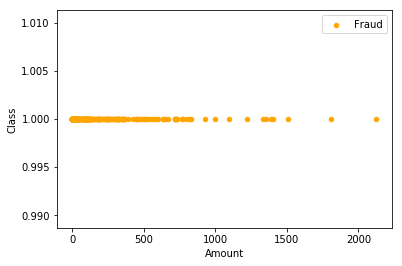

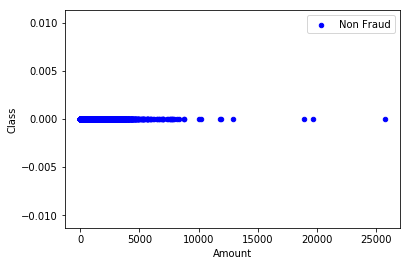

In [51]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Non Fraud')
plt.show()

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
x = df.iloc[:,:-1]
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

In [0]:
logistic = linear_model.LogisticRegression(C=1e5)

In [64]:
logistic.fit(X_train, y_train)
print('Score: ', logistic.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9988664065086323


In [65]:
y_predicted = np.array(logistic.predict(X_test))
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

Plot two first features to visually evaluate if just 2 features are enough for classification

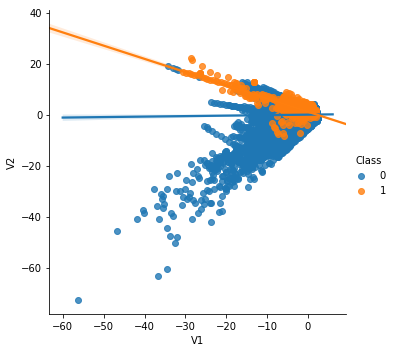

In [66]:
import seaborn as sns
sns.lmplot(x='V1', y='V2', data=df, hue='Class')

Just 2 features cannot classify the data correctly with any decision boundary. 
As seen on above, however, when using all dimensions, we can classify using a linear decision boundary and achieve >99.9% accuracy

Let's explore the importance of the different classes using their respective coefficients in the trained model

In [67]:
print(np.abs(np.squeeze(logistic.coef_)))

[8.97762707e-05 1.17629848e-01 3.01175886e-01 6.75909303e-01
 1.36846438e-01 2.56295599e-02 5.59082050e-02 1.34238676e-02
 8.83372226e-02 3.40071263e-01 1.76080162e-01 1.18972233e-01
 1.57336308e-02 2.32134838e-01 6.33600009e-01 1.37656410e-01
 2.15878243e-01 3.96370305e-01 1.92147174e-02 4.91618076e-02
 2.02483671e-02 1.14374005e-01 1.52865505e-01 3.41505594e-02
 2.04157816e-02 1.10543685e-01 1.33383798e-02 4.18593568e-02
 1.79243160e-02 8.03843516e-03]


<BarContainer object of 30 artists>

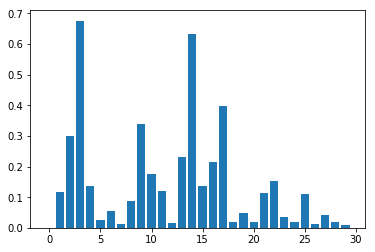

In [68]:
plt.bar(range(0,30),np.abs(np.squeeze(logistic.coef_)))

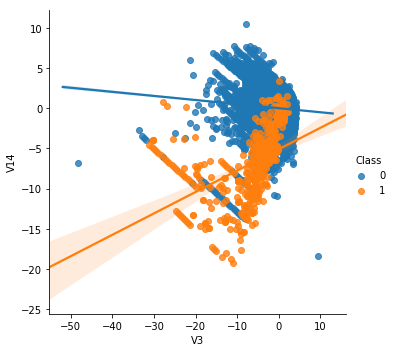

In [69]:
sns.lmplot(x='V3', y='V14', data=df, hue='Class')

Although these classes look like they could create a better separation, this is still not enough to achieve any reasonable accuracy. More than two classes need to be used for the decision